In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal
import math
from numpy.linalg import inv
from numpy import matmul as mm
import scipy
from scipy.linalg import lu_factor,lu_solve
from scipy.linalg import cho_factor,cho_solve
from scipy.stats import multivariate_normal

### Linear Regression
$$ f(x) = w_1+w_2x$$
Assume that the prior distribution of the weight is, 
$$p(\mathbf{w})=\mathcal{N}(0,\mathbf{I})$$
The observed data is given by,
$$y=f(x)+\epsilon$$
where $\epsilon \sim \mathcal{N}(0,\sigma^2)$.

### Residual sum of squares (RSS)
$$RSS=e^2_1+e^2_2+\cdots+e^2_n$$
where $e_i=y_i-\hat{y}_i=y_i-\hat{w}_1-\hat{w}_2x_i$.

In [2]:
w1, w2 = np.mgrid[-5:5:.02, -5:5:.02]
pos = np.dstack((w1, w2))
print(w1.shape, w2.shape)

(500, 500) (500, 500)


In [3]:
x = np.array([[-5,2,5]])
x_ = np.vstack((np.array([1,1,1]),x))
w = np.random.randn(1,2)
n = np.random.randn(1,3)
y = mm(w,x_)+n
print(x.shape,y.shape)

(1, 3) (1, 3)


In [4]:
y.shape

(1, 3)

In [5]:
sqrt_diff = (y-(np.expand_dims(w1,axis=2)+np.expand_dims(w2,axis=2)*x))**2
rss = np.sum(sqrt_diff,axis=2)
print(rss.shape)

(500, 500)


[[1.02781769 0.53451786]]


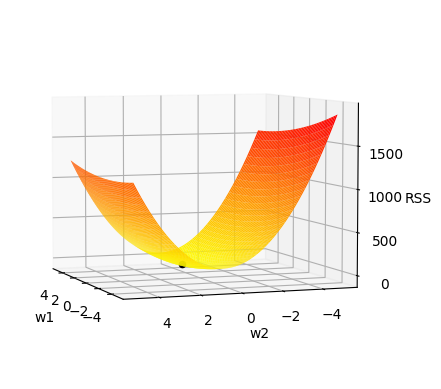

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(w1,w2, rss, cmap="autumn_r")
ax.scatter(w[0,0],w[0,1],0,marker='o',color='black')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('RSS')
print(w)
ax.view_init(5, 160)

[[1.02781769 0.53451786]]


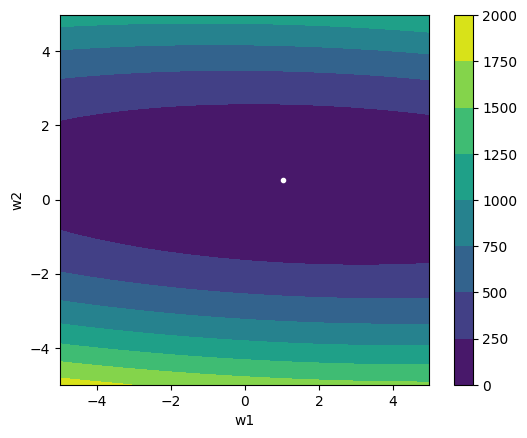

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(w1,w2,rss)
ax.plot(w[0,0],w[0,1],'w.')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
fig.colorbar(cs)
ax.set_aspect(1)
print(w)

### Closed Form Solution

### Gradient Descent

### References
1. https://machinelearningcompass.com/machine_learning_models/ridge_regression/